In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


ROOT_DIR = Path().absolute()
DATA_FOLDER = ROOT_DIR / "data"
ETL_FOLDER = ROOT_DIR / "etl"

In [14]:
# get all files from the data folder
dfs_data = []
for file in DATA_FOLDER.glob("data_*.csv"):
    df = pd.read_csv(file)
    df["source"] = "origin"
    df["date"] = pd.to_datetime(df["date"])
    dfs_data.append(df)

#get all files from the etl folder
for file in ETL_FOLDER.glob("data_*.csv"):
    df = pd.read_csv(file)
    df["source"] = "etl"
    df["date"] = pd.to_datetime(df["date"])
    dfs_data.append(df)
df_data = pd.concat(dfs_data, ignore_index=True)

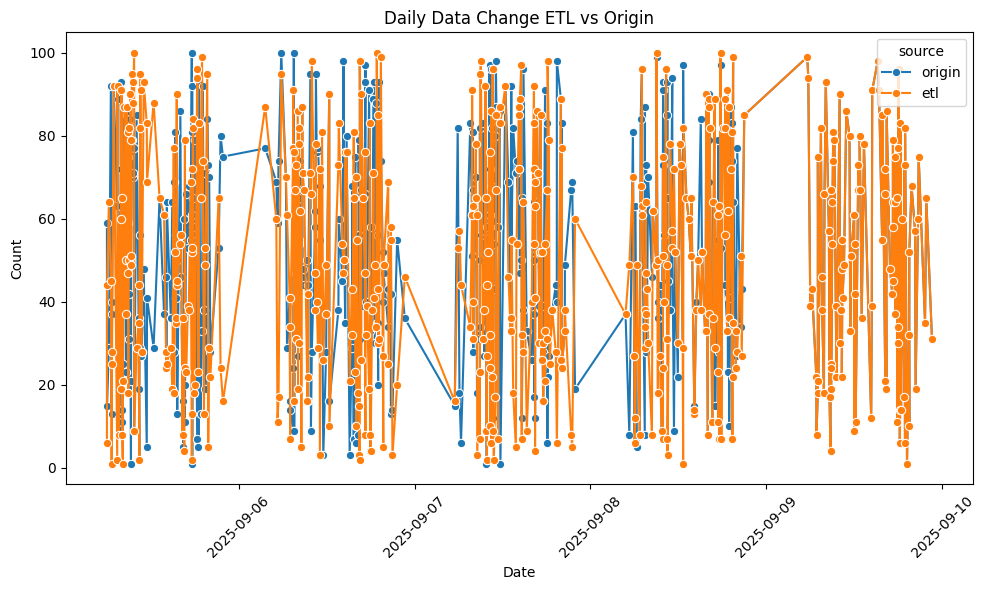

In [15]:

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_data, x="date", y="count", hue="source", marker="o")

plt.title("Daily Data Change ETL vs Origin")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As you can see every day we run the generator the historical data changes so you need to make a decision on how to fix this.
One approach could be to extract all the data all the time.
- What is the cost?
- How many records can you extract until it gets too much.
- What is the business requirement?
    - do they want it every day at 8am?
    - Do they want it "real time"?
        - Does real time means it can take up to 10 min to recrate the historical data?
- How many records per day is too much? 1k, 10k 100k?
- How many days is too many days? 1 month? 12 months? 24 months?
    - Does data after N months changes?

In [ ]:
# Simulate many days

from generator import simulate_daily_transactions
import time


SIMULATED_DAYS = 365*2 

ETL_FOLDER.mkdir(parents=True, exist_ok=True)

start_time = time.perf_counter()
for _ in range(SIMULATED_DAYS):
    # simulate daily transaction
    file_name = simulate_daily_transactions(records_per_day=100_000, simulate_historic_changes=False)
    print(f"Generated {file_name}")
end_time = time.perf_counter()
elapsed_time = end_time - start_time

In [16]:
from pathlib import Path

root_directory = Path('.')
total_size = sum(f.stat().st_size for f in DATA_FOLDER.glob('**/*') if f.is_file())
total_days = sum(1 for f in DATA_FOLDER.glob('**/*') if f.is_file())
print(f"Elapsed time:{elapsed_time / 60:.2f} Min\nDays {total_days}\nSize: {total_size / (1024 ** 3):.2f} GB")

Elapsed time:25.68 Min
Days 730
Size: 2.16 GB
